# Dataset creation for: Explanatory varibales 

In [1]:
# import modules 
import numpy as np 
import pandas as pd 
import geopandas as gdp
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
%config InlineBackend.figure_format='retina'
# set var path 
path = 'Input/'

In [4]:
# import the world map 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
# taking the nuts reference (all nuts)
shape = gpd.read_file('../../02_Data/01_GIS/02_Full file/Full shape/Full shape.shp')
nuts_list = shape[['NUTS_ID']]

## 1. Read the intial data

In [10]:
# read data 
X = pd.read_excel(path + 'Xis.xlsx', sheet_name = 'Data').drop(['COVID19_CCONF', 'COVID_Cases_R', 'COVID19_TESTS', 'COVID19_D'], axis = 1)

X.columns = ['COUNTRY', 'NUTS2', 'NUTS3', 'CODE', 'CODE_NUTS2', 'CODE_NUTS3',
       'POPULATION_2019', 'POP_DENS_2019', 'POP>=60_2019', '%POP>=60_2019', 'FEMEALES_2018', '%FEMEALS_2019',
       'POP 0-14_2019', 'POP 15-29_2019', 'POP 30-44_2019', 'POP 45-59_2019', 'POP_GROWTH_2019',
       'HOUSEHOLDS_2019', 'DWELLINGS_2019', 'SURFACE AREA_2019', 'UNEM_R_2018', 'D_MEDICALE_2018',
       'COPD %_2018', 'Respiratory dis mortality_2018', 'Smokers %_2018', 'Diabetes %_2018',
       'Diabetes mortality_2018', 'Cardiovascular dis mortality_2018',
       'BEDS_Intcare/reanim_2018', 'COVID_Mortality_R',
       'DURATION_LD (days)_2020', 'Lag_1stCase-LD (days)_2020', 'LD_SEVEIRTY_W1',
       'LD_SEVEIRTY_W2', 'LD_SEVEIRTY_W3', 'LD_SEVEIRTY_W4', 'LD_SEVEIRTY_W5',
       'LD_SEVEIRTY_W6', 'LD_SEVEIRTY_W7', 'LD_SEVEIRTY_W8', 'LD_SEVEIRTY_W9',
       'LD_SEVEIRTY_W10', 'LD_SEVEIRTY_W11', 'LD_SEVEIRTY_W12',
       'LD_SEVEIRTY_W13', 'LD_SEVEIRTY_W14', 'LD_SEVEIRTY_W15',
       'LD_SEVEIRTY_W16', 'LD_SEVEIRTY_W17', 'LD_SEVEIRTY_W18',
       'LD_SEVEIRTY_W19', 'LD_SEVEIRTY_W20', 'LD_SEVEIRTY_W21',
       'LD_SEVEIRTY_W22', 'LD_SEVEIRTY_W23', 'LD_SEVEIRTY_W24',
       'LD_SEVEIRTY_W25', 'LD_SEVEIRTY_W26', 'LD_SEVEIRTY_W27',
       'LD_SEVEIRTY_W28', 'LD_SEVEIRTY_W29', 'LD_SEVEIRTY_W30',
       'LD_SEVEIRTY_W31', 'LD_SEVEIRTY_W32', 'LD_SEVEIRTY_W33',
       'LD_SEVEIRTY_W34', 'LD_SEVEIRTY_W35', 'NO2_avg', 'WIND_Avg',
       'Temp_mean_over12yrs', 'NTL_avg_2019', 'PRESSURE_avg', 'PRECIPITATION',
       'SOLAR_RAD_avg', 'LAI_avg_2020']

# add code nuts1 
X['CODE_NUTS1'] = X['CODE_NUTS2'].apply(lambda x: x[:3])

X = X[['CODE_NUTS1', 'CODE_NUTS2', 'CODE_NUTS3',
       'POPULATION_2019', 'POP_DENS_2019', 'POP>=60_2019', '%POP>=60_2019',
       'FEMEALES_2018', '%FEMEALS_2019', 'POP 0-14_2019', 'POP 15-29_2019',
       'POP 30-44_2019', 'POP 45-59_2019', 'POP_GROWTH_2019',
       'HOUSEHOLDS_2019', 'DWELLINGS_2019', 'SURFACE AREA_2019', 'UNEM_R_2018',
       'D_MEDICALE_2018', 'COPD %_2018', 'Respiratory dis mortality_2018',
       'Smokers %_2018', 'Diabetes %_2018', 'Diabetes mortality_2018',
       'Cardiovascular dis mortality_2018', 'BEDS_Intcare/reanim_2018',
       'COVID_Mortality_R', 'DURATION_LD (days)_2020',
       'Lag_1stCase-LD (days)_2020', 'LD_SEVEIRTY_W1', 'LD_SEVEIRTY_W2',
       'LD_SEVEIRTY_W3', 'LD_SEVEIRTY_W4', 'LD_SEVEIRTY_W5', 'LD_SEVEIRTY_W6',
       'LD_SEVEIRTY_W7', 'LD_SEVEIRTY_W8', 'LD_SEVEIRTY_W9', 'LD_SEVEIRTY_W10',
       'LD_SEVEIRTY_W11', 'LD_SEVEIRTY_W12', 'LD_SEVEIRTY_W13',
       'LD_SEVEIRTY_W14', 'LD_SEVEIRTY_W15', 'LD_SEVEIRTY_W16',
       'LD_SEVEIRTY_W17', 'LD_SEVEIRTY_W18', 'LD_SEVEIRTY_W19',
       'LD_SEVEIRTY_W20', 'LD_SEVEIRTY_W21', 'LD_SEVEIRTY_W22',
       'LD_SEVEIRTY_W23', 'LD_SEVEIRTY_W24', 'LD_SEVEIRTY_W25',
       'LD_SEVEIRTY_W26', 'LD_SEVEIRTY_W27', 'LD_SEVEIRTY_W28',
       'LD_SEVEIRTY_W29', 'LD_SEVEIRTY_W30', 'LD_SEVEIRTY_W31',
       'LD_SEVEIRTY_W32', 'LD_SEVEIRTY_W33', 'LD_SEVEIRTY_W34',
       'LD_SEVEIRTY_W35', 'NO2_avg', 'WIND_Avg', 'Temp_mean_over12yrs',
       'NTL_avg_2019', 'PRESSURE_avg', 'PRECIPITATION', 'SOLAR_RAD_avg',
       'LAI_avg_2020']]

# melt the dataset 
X = X.melt(id_vars = X.columns[3:], value_name = 'nuts_id')

X = X[~(X['nuts_id'] == '-')]
# set the nuts level
X['variable'] = X['variable'].apply(lambda x: str(x)[-1])
X.rename(columns = {"variable": 'nuts_level', 'nuts_id': 'NUTS_ID'}, inplace = True)

# see the output 
X

,POPULATION_2019,POP_DENS_2019,POP>=60_2019,%POP>=60_2019,FEMEALES_2018,%FEMEALS_2019,POP 0-14_2019,POP 15-29_2019,POP 30-44_2019,POP 45-59_2019,...,NO2_avg,WIND_Avg,Temp_mean_over12yrs,NTL_avg_2019,PRESSURE_avg,PRECIPITATION,SOLAR_RAD_avg,LAI_avg_2020,nuts_level,NUTS_ID
1,297048,NaN,87107.0,29.324217,151348.0,50.950688,39085.0,43364.0,54915.0,72577.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AT1
2,37899,54.0,12030.0,31.742262,19302.0,50.930104,4750.0,5301.0,6601.0,9217.0,...,2.630771,3.000289,9.207416,8.241319,0.923921,57.232225,11746.180873,1.790256,1,AT1
3,161164,90.0,44838.0,27.821350,82196.0,51.001464,22201.0,23890.0,31074.0,39161.0,...,2.630771,3.175656,10.078024,12.364236,0.964879,49.182485,11775.125172,1.447596,1,AT1
4,97985,67.0,30239.0,30.860846,49850.0,50.875134,12134.0,14173.0,17240.0,24199.0,...,2.151366,2.412818,9.107134,9.802083,0.940495,62.468139,11758.273024,1.877442,1,AT1
5,1698811,NaN,449914.0,26.484053,862415.0,50.765800,245548.0,276435.0,317206.0,409708.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AT1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,145286,73.0,34646.0,23.846757,73246.0,50.415043,26888.0,26533.0,26101.0,31118.0,...,1.467555,5.260761,8.876803,8.998803,0.954414,109.720370,8835.869048,2.323968,3,UKN12
4409,143664,198.0,31598.0,21.994376,73719.0,51.313481,28347.0,25994.0,28121.0,29604.0,...,1.467555,4.480453,9.042322,23.145833,0.961360,85.517360,8908.740962,1.794279,3,UKN13
4410,145856,288.0,33225.0,22.779317,74273.0,50.922142,27776.0,25027.0,28694.0,31134.0,...,1.467555,4.815490,8.898968,25.309896,0.969130,79.688079,8935.650675,2.056716,3,UKN14
4411,139867,134.0,34601.0,24.738502,71195.0,50.901928,25317.0,24406.0,25114.0,30429.0,...,1.467555,5.324285,8.642288,13.358796,0.942485,92.498278,8848.130693,2.375605,3,UKN15


In [11]:
X = pd.merge(nuts_list, X, on = 'NUTS_ID', how = 'left')

In [12]:
X.drop(columns = 'nuts_level', inplace = True)

In [13]:
X

,NUTS_ID,POPULATION_2019,POP_DENS_2019,POP>=60_2019,%POP>=60_2019,FEMEALES_2018,%FEMEALS_2019,POP 0-14_2019,POP 15-29_2019,POP 30-44_2019,...,LD_SEVEIRTY_W34,LD_SEVEIRTY_W35,NO2_avg,WIND_Avg,Temp_mean_over12yrs,NTL_avg_2019,PRESSURE_avg,PRECIPITATION,SOLAR_RAD_avg,LAI_avg_2020
0,BG423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BG424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BG425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CH011,802965.0,276.0,172276.0,21.454982,408618.0,50.888644,129682.0,154695.0,173840.0,...,0.0,0,1.773749,2.584903,7.639801,17.314815,0.836289,104.241807,12472.272862,1.720357
4,CH012,345051.0,66.0,87492.0,25.356252,174125.0,50.463555,50223.0,62745.0,67311.0,...,0.0,0,2.432259,4.182854,1.127017,9.817428,0.531620,87.332027,14068.824207,0.928472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633,Viana do Castelo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4634,Vila Real,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4635,Viseu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4636,Évora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Read complementary data 

### 2.1 At risk of poverty 

In [14]:
risk_poverty = pd.read_excel(path + 'At-risk-of-poverty rate by NUTS regions.xlsx', sheet_name = 'Sheet 1', skiprows = 8, nrows = 267)
risk_poverty =  pd.concat([risk_poverty.iloc[:,:2],risk_poverty.iloc[:,2:].iloc[:,::2]], axis = 1)
risk_poverty.columns = ['NUTS_ID', 'nuts_name', 'at risk of poverty_2016', 'at risk of poverty_2017', 'at risk of poverty_2018', 'at risk of poverty_2019', 'at risk of poverty_2020']

for col in risk_poverty.iloc[:, 2:].columns:
    risk_poverty[col] = risk_poverty[col].replace(':', np.nan)
    
risk_poverty.drop(columns = 'nuts_name', inplace = True)
risk_poverty

C:\Users\mhachaichi\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NUTS_ID,at risk of poverty_2016,at risk of poverty_2017,at risk of poverty_2018,at risk of poverty_2019,at risk of poverty_2020
0,BE,15.5,15.9,16.4,14.8,14.1
1,BE1,NaN,NaN,NaN,31.4,27.8
2,BE2,NaN,NaN,NaN,9.8,9.3
3,BE3,NaN,NaN,NaN,18.3,18.2
4,BG,22.9,23.4,22.0,22.6,23.8
...,...,...,...,...,...,...
262,RS,25.9,25.7,24.3,23.2,21.7
263,RS1,22.5,22.0,19.6,16.4,15.7
264,RS2,29.4,29.5,29.2,30.4,28.1
265,TR,22.8,22.2,22.2,22.4,23.0


### 2.2 GDP 

In [15]:
gdp = pd.read_csv(path + 'Gross domestic product (GDP) at current market prices by NUTS 3 regions.csv').query('TIME_PERIOD == 2019')[['geo', 'OBS_VALUE']]
gdp.columns = ['NUTS_ID', 'GDP_2019']
gdp

,NUTS_ID,GDP_2019
9,AL,13644.67
19,AL0,13644.67
29,AL01,3142.06
39,AL011,411.05
49,AL012,1389.50
...,...,...
15925,TRC3,9653.76
15935,TRC31,3786.14
15945,TRC32,2222.47
15955,TRC33,2260.83


### 2.3 Household size 

In [19]:
# my collected data 
hh_size= pd.read_excel(path + 'Household size.xlsx').drop('year ', axis =1)[['nuts_id', 'average household size', 'nuts_level']]
hh_size.rename(columns = {"average household size": 'household size'}, inplace = True)
# from EU CFs data 
hh_si = pd.read_excel(path + 'erl_12_5_054013_supptables.xlsx', sheet_name = 'A6 Regional dataset', header = 1)[['NUTS2 code ', 'NUTS2 name', 'NUTS level (NUTS1 or NUTS2)', 'Household size']]
hh_si.dropna(subset = ['Household size'], inplace= True)
hh_si = hh_si[['NUTS2 code ', 'Household size' , 'NUTS level (NUTS1 or NUTS2)']]
hh_si = hh_si[~(hh_si['NUTS2 code '].isin(["SI0", 'LV00']))]
hh_si.columns = ['nuts_id', 'household size', 'nuts_level']
# merge the to datasets 
household_size = pd.concat([hh_size, hh_si], axis =0)
household_size.rename({"nuts_id": 'NUTS_ID'}, axis = 1, inplace = True)
# remove the '0' at the end from level 1 ids
household_size['NUTS_ID'] = household_size['NUTS_ID'].apply(lambda x: x.strip())

household_size.drop(columns = 'nuts_level', inplace = True)
household_size

,NUTS_ID,household size
0,AT21,2.27
1,AT12,2.15
2,AT32,2.62
3,AT22,2.24
4,AT33,2.20
...,...,...
172,UKL,2.38
173,UKG,2.35
174,UKI,2.54
175,UKM,2.23


(-20.0, 45.0, 32.0, 72.0)

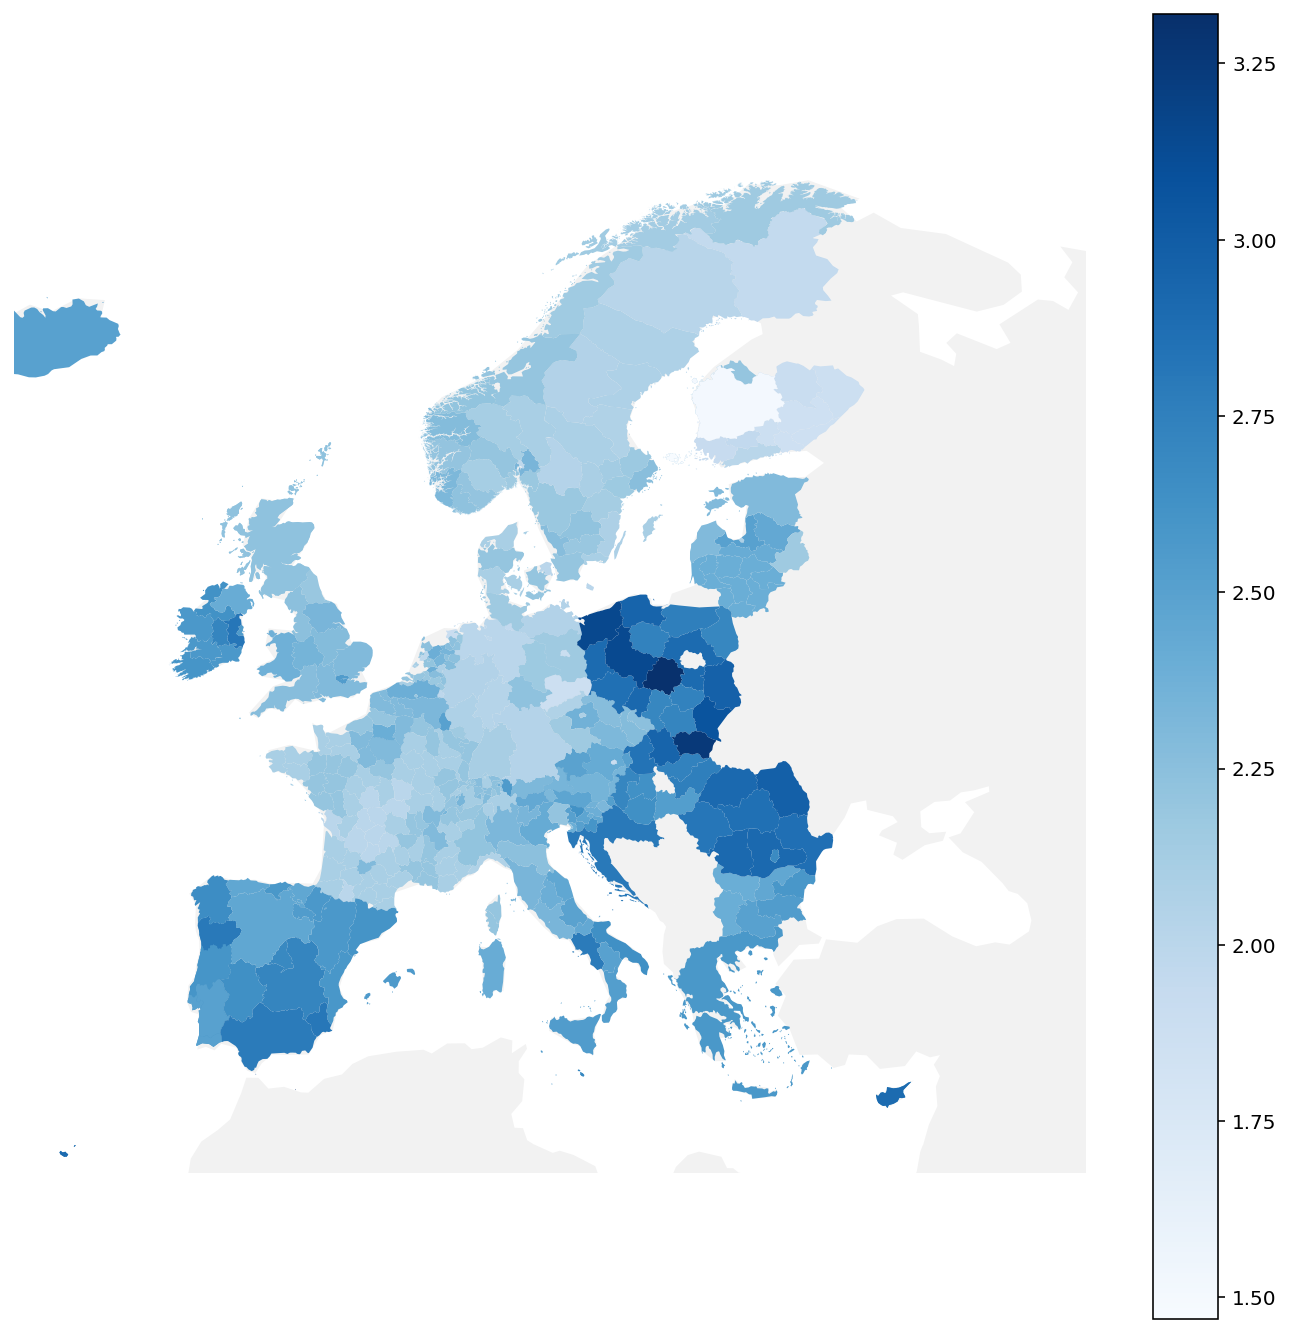

In [20]:
fig, ax = plt.subplots(figsize = (12,12))
world.plot(ax =ax, color = 'gray', alpha = .1)
gpd.GeoDataFrame(pd.merge(household_size, shape, left_on = 'NUTS_ID', right_on = 'NUTS_ID')).plot(
    column = 'household size', figsize= (12,12), cmap = 'Blues', legend = True, ax =ax)
plt.xlim(-20, 45)
plt.ylim(32, 72)
plt.axis('off')

### 2.4 People at risk of poverty or social exclusion by NUTS regions

In [21]:
social_exclusion = pd.read_excel(path + 'People at risk of poverty or social exclusion by NUTS regions.xlsx', sheet_name = 'Sheet 1', skiprows = 8, nrows = 267)
social_exclusion = pd.concat([social_exclusion.iloc[:,:2], social_exclusion.iloc[:,2:].iloc[:,::2]], axis = 1)
social_exclusion.columns = ['NUTS_ID', 'nuts_name', 'social_exclusion_2016', 'social_exclusion_2017', 'social_exclusion_2018', 'social_exclusion_2019', 'social_exclusion_2020']

for col in social_exclusion.iloc[:, 2:].columns:
    social_exclusion[col] = social_exclusion[col].replace(':', np.nan)

social_exclusion.drop(columns = 'nuts_name', inplace = True)
social_exclusion 

C:\Users\mhachaichi\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NUTS_ID,social_exclusion_2016,social_exclusion_2017,social_exclusion_2018,social_exclusion_2019,social_exclusion_2020
0,BE,20.9,20.6,20.0,19.5,18.9
1,BE1,NaN,NaN,NaN,37.8,34.3
2,BE2,NaN,NaN,NaN,13.2,13.0
3,BE3,NaN,NaN,NaN,24.6,24.6
4,BG,40.4,38.9,32.8,32.8,32.1
...,...,...,...,...,...,...
262,FI1C,16.3,15.3,17.5,16.3,16.3
263,FI1D,19.1,17.5,20.0,19.0,19.3
264,SE,18.3,17.7,18.0,18.8,17.9
265,SE1,16.2,15.7,15.3,16.5,16.4


### 2.5 People living in households with very low work intensity by NUTS regions (population aged 0 to 59 years)

In [23]:
low_work_intesnity = pd.read_excel(path + 'People living in households with very low work intensity by NUTS regions (population aged 0 to 59 years).xlsx', sheet_name = 'Sheet 1', skiprows = 8, nrows = 267)

low_work_intesnity = pd.concat([low_work_intesnity.iloc[:,1], low_work_intesnity.iloc[:,::2]], axis = 1)
low_work_intesnity.columns = ['nuts_name', 'NUTS_ID', 'low_work_intesnity_2016', 'low_work_intesnity_2017', 'low_work_intesnity_2018', 'low_work_intesnity_2019', 'low_work_intesnity_2020']

for col in low_work_intesnity.iloc[:, 1:].columns:
    low_work_intesnity[col] = low_work_intesnity[col].replace(':', np.nan)

low_work_intesnity.drop('nuts_name', axis =1, inplace = True)
low_work_intesnity

C:\Users\mhachaichi\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NUTS_ID,low_work_intesnity_2016,low_work_intesnity_2017,low_work_intesnity_2018,low_work_intesnity_2019,low_work_intesnity_2020
0,BE,14.9,13.9,12.6,12.4,11.9
1,BE1,NaN,NaN,NaN,24.1,20.9
2,BE2,NaN,NaN,NaN,7.4,7.6
3,BE3,NaN,NaN,NaN,17.1,16.4
4,BG,11.9,11.1,9.0,9.3,8.5
...,...,...,...,...,...,...
262,RS,21.5,20.1,18.0,16.6,16.2
263,RS1,20.0,18.9,15.5,13.7,14.1
264,RS2,23.1,21.4,20.7,19.7,18.5
265,TR,10.1,10.0,9.7,10.2,11.2


### 2.6 Population density 

In [90]:
area = pd.read_csv(path + 'Area by NUTS 3 region.csv').query('TIME_PERIOD == 2016')[['geo', 'OBS_VALUE']]
area.columns = ['nuts_id', 'area']
area
population = pd.read_excel(path + 'Population on 1 January by age group, sex and NUTS 3 region.xlsx', sheet_name = 'Sheet 1', skiprows = 10, nrows = 267)
population = pd.concat([population.iloc[:,:2], population.iloc[:,2:].iloc[:,::2]], axis = 1)

population.columns = ['nuts_id', 'nuts_name', 'population_2014', 'population_2015', 'population_2016', 'population_2017', 'population_2018', 'population_2019',
                     'population_2020']
population['population_2020'] = population['population_2020'].replace(':', np.nan)
population = population[['nuts_id', 'population_2019', 'population_2020']]

pop_den = pd.merge(population, area, on = 'nuts_id')
pop_den['Population density_2019'] = pop_den.eval('population_2019 / area')
pop_den['Population density_2020'] = pop_den.eval('population_2020 / area')
pop_den = pop_den.loc[:, ['nuts_id', 'Population density_2019', 'Population density_2020']]
pop_den.rename(columns = {"nuts_id": 'NUTS_ID'}, inplace = True)
population.rename({'nuts_id': 'NUTS_ID'}, axis = 1, inplace = True)
pop_den

,NUTS_ID,Population density_2019,Population density_2020
0,EU27_2020,105.664621,105.871354
1,EU28,114.798666,NaN
2,BE,373.557653,375.739907
3,BE1,7501.790123,7551.629630
4,BE10,7501.790123,7551.629630
...,...,...,...
261,DE258,382.368078,383.885993
262,DE259,212.956250,213.490000
263,DE25A,79.213891,79.726914
264,DE25B,141.852514,141.618994


### 2.7 cases, deaths, Exc. mortality (tree waves for each)

In [117]:
## read the data 
# cases 
cases = pd.read_excel('../../02_Data/02_Pandemic variables/01_Cases/EU_Cases_Daily_Unstacked.xlsx', index_col = 'nuts_id').drop('country', axis =1)
# deaths 
deaths = pd.read_excel('../../02_Data/02_Pandemic variables/02_Deaths/EU_Deaths_Daily_Unstacked.xlsx', index_col = 'nuts_id').drop('country', axis =1)
# mortality 
mortality = pd.read_excel('../../02_Data/02_Pandemic variables/03_Exc. Mortality/COVID_Excess_Mortality_v220103.xlsx',
                          sheet_name = 'EM_FINAL_absolute').drop(['Country',
                                                                  'NUTS_level', 'NUTS level 3', 'Pop_2020_01_01'], axis =1)
## clean mortality 
mortality = mortality.melt(id_vars = 'NUTS_ID_2021', value_name = 'mortality', var_name = 'date')
mortality.rename(columns = {'NUTS_ID_2021': 'nuts_id'}, inplace = True)
mortality['date'] = pd.to_datetime(mortality['date']).dt.normalize()
mortality  = mortality.pivot_table(index = 'nuts_id', columns = 'date', values = 'mortality')

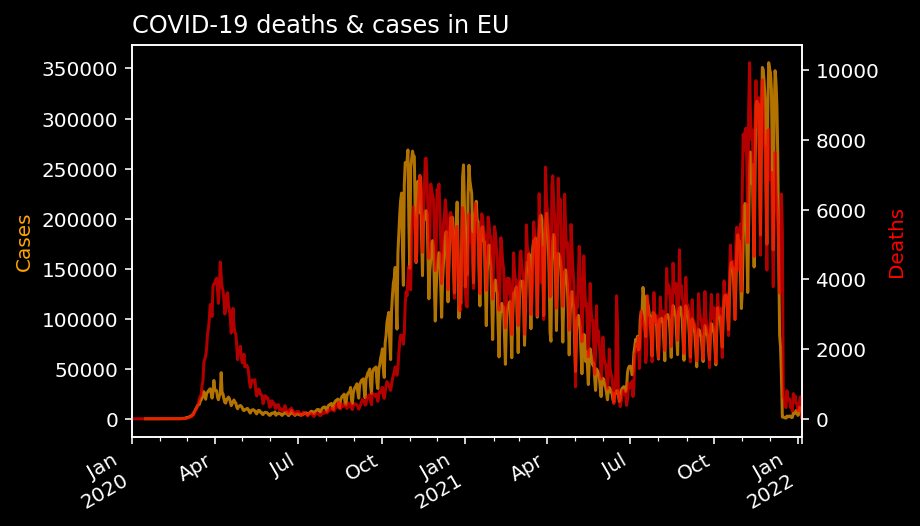

In [122]:
with plt.style.context('dark_background'):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    cases.iloc[:,1:].sum().plot(ax =ax1, color = 'orange', alpha = .7)
    deaths.sum().plot(ax =ax2, color = 'red', alpha = .7)
    ax1.set_ylabel('Cases', color='orange')
    ax2.set_ylabel('Deaths', color='r')
plt.title('COVID-19 deaths & cases in EU', loc = 'left') 
plt.show()

In [123]:
# Cases 
# First wave 2020-03 to 2020-05
cases['C_first_wave'] = cases.loc[:, pd.to_datetime('2020-03-01') : pd.to_datetime('2020-05-01')].sum(axis =1)
cases['C_second_wave'] = cases.loc[:, pd.to_datetime('2020-09-01') : pd.to_datetime('2021-05-01')].sum(axis =1)
cases['C_third_wave'] = cases.loc[:, pd.to_datetime('2021-07-01') : pd.to_datetime('2021-12-01')].sum(axis =1)
cases = cases.filter(like = 'wave')

# deaths waves 
deaths['D_first_wave'] = deaths.loc[:, pd.to_datetime('2020-03-01') : pd.to_datetime('2020-05-01')].sum(axis =1)
deaths['D_second_wave'] = deaths.loc[:, pd.to_datetime('2020-09-01') : pd.to_datetime('2021-05-01')].sum(axis =1)
deaths['D_third_wave'] = deaths.loc[:, pd.to_datetime('2021-07-01') : pd.to_datetime('2021-12-01')].sum(axis =1)
deaths = deaths.filter(like = 'wave')

# Exc. mortality waves
mortality['M_first_wave'] = mortality.loc[:, pd.to_datetime('2020-03-01') : pd.to_datetime('2020-05-24')].sum(axis =1)
mortality['M_second_wave'] = mortality.loc[:, pd.to_datetime('2020-09-13') : pd.to_datetime('2021-05-23')].sum(axis =1)
mortality['M_third_wave'] = mortality.loc[:, pd.to_datetime('2021-07-04') : pd.to_datetime('2021-10-31')].sum(axis =1)
mortality = mortality.filter(like = 'wave')

In [124]:
from functools import reduce 

data_frame = [cases.reset_index(), deaths.reset_index(), mortality.reset_index()]
waves = reduce(lambda  left,right: pd.merge(left,right,on=['nuts_id'],
                                            how='outer'), data_frame)
waves.rename(columns = {"nuts_id": 'NUTS_ID'}, inplace = True)

**Assumption: compute COVID-19 death rate**

- Assuming that the **"first wave"** was in 2020: (10 000*(cumulative death toll due to COVID-19/Population in 2020))
- Assuming that the **"second & third waves"** was in 2021: 10 000*(cumulative death toll due to COVID-19/Population in 2021)

## 2.8 urban-rural typologies 

In [125]:
typos = pd.read_excel(path + 'Urban-rural-NUTS-2016.xlsx', sheet_name = "Urban-rural typology 2016", skiprows = 4).iloc[:,:2]
typos_map = {1: "predominantly urban", 2: "intermediate", 3: "predominantly rural"}
typos['URB_RURAL_CLASS'] = typos['URB_RURAL_CLASS'].map(typos_map) 
typos.rename({"URB_RURAL_CLASS": "Typology"}, axis = 1, inplace = True)

# Merge the data 

Merge the collected dataset.

In [126]:
df = [risk_poverty, gdp, household_size, social_exclusion, low_work_intesnity, population, pop_den, waves, typos]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on='NUTS_ID',
                                            how='outer'), df)
df_merged

,NUTS_ID,at risk of poverty_2016,at risk of poverty_2017,at risk of poverty_2018,at risk of poverty_2019,at risk of poverty_2020,GDP_2019,household size,social_exclusion_2016,social_exclusion_2017,...,C_first_wave,C_second_wave,C_third_wave,D_first_wave,D_second_wave,D_third_wave,M_first_wave,M_second_wave,M_third_wave,Typology
0,BE,15.5,15.9,16.4,14.8,14.1,476203.30,NaN,20.9,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BE1,NaN,NaN,NaN,31.4,27.8,86650.96,2.19,NaN,NaN,...,NaN,NaN,NaN,1262.0,1581.0,245.0,NaN,NaN,NaN,NaN
2,BE2,NaN,NaN,NaN,9.8,9.3,279227.25,2.39,NaN,NaN,...,NaN,NaN,NaN,3872.0,7448.0,546.0,NaN,NaN,NaN,NaN
3,BE3,NaN,NaN,NaN,18.3,18.2,110043.63,2.32,NaN,NaN,...,NaN,NaN,NaN,2828.0,5356.0,554.0,NaN,NaN,NaN,NaN
4,BG,22.9,23.4,22.0,22.6,23.8,61239.54,NaN,40.4,38.9,...,NaN,NaN,NaN,68.0,15815.0,10481.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,RS225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate
2114,RS226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate
2115,RS227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate
2116,RS228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate


Merge the collected datasets with the initial dataset.

In [127]:
final_dataset = pd.merge(X, df_merged, on = 'NUTS_ID', how = 'left')

In [128]:
final_dataset.columns.tolist()

['NUTS_ID',
 'POPULATION_2019',
 'POP_DENS_2019',
 'POP>=60_2019',
 '%POP>=60_2019',
 'FEMEALES_2018',
 '%FEMEALS_2019',
 'POP 0-14_2019',
 'POP 15-29_2019',
 'POP 30-44_2019',
 'POP 45-59_2019',
 'POP_GROWTH_2019',
 'HOUSEHOLDS_2019',
 'DWELLINGS_2019',
 'SURFACE AREA_2019',
 'UNEM_R_2018',
 'D_MEDICALE_2018',
 'COPD %_2018',
 'Respiratory dis mortality_2018',
 'Smokers %_2018',
 'Diabetes %_2018',
 'Diabetes mortality_2018',
 'Cardiovascular dis mortality_2018',
 'BEDS_Intcare/reanim_2018',
 'COVID_Mortality_R',
 'DURATION_LD (days)_2020',
 'Lag_1stCase-LD (days)_2020',
 'LD_SEVEIRTY_W1',
 'LD_SEVEIRTY_W2',
 'LD_SEVEIRTY_W3',
 'LD_SEVEIRTY_W4',
 'LD_SEVEIRTY_W5',
 'LD_SEVEIRTY_W6',
 'LD_SEVEIRTY_W7',
 'LD_SEVEIRTY_W8',
 'LD_SEVEIRTY_W9',
 'LD_SEVEIRTY_W10',
 'LD_SEVEIRTY_W11',
 'LD_SEVEIRTY_W12',
 'LD_SEVEIRTY_W13',
 'LD_SEVEIRTY_W14',
 'LD_SEVEIRTY_W15',
 'LD_SEVEIRTY_W16',
 'LD_SEVEIRTY_W17',
 'LD_SEVEIRTY_W18',
 'LD_SEVEIRTY_W19',
 'LD_SEVEIRTY_W20',
 'LD_SEVEIRTY_W21',
 'LD_SEVEI

# Export the dataset 

In [ ]:
final_dataset.to_excel('Output/Xis.xlsx', index = False)